# ECBM E4040 - Assignment 2 - Task 4: Data Augmentation

One important factor in neural network training is the size of the traininig set. Since it is often not possible to get a clean and large enough dataset for training, one way to improve the network's robustness and generalization ability is to create 'fake' data by injecting random noise or doing random transformations on the available data. A technique which implements this strategy is called __data augmentation__, and has shown to be very effective.

One thing to remember, when you augment your data, is to never change the correct label of a sample. For example, for hand-written digit dataset, flipping a letter 'b' ends up looking like a letter 'd', but you must keep the label for 'b'. So please choose the best augmentation methods for your dataset.

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Import modules
from __future__ import print_function
import numpy as np
from ecbm4040.cifar_utils import load_data
import matplotlib.pyplot as plt

## Load Data

In [3]:
X_train, y_train, X_test, y_test = load_data()

num_train = 49000
num_val = 1000
num_test = 10000
num_dev = 128

# The development set is used for augmentation practices.
mask = np.random.choice(num_train, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

# Seperate Training set into a training set and a validation set
X_val = X_train[num_train:]
y_val = y_train[num_train:]
X_train = X_train[:num_train]
y_train = y_train[:num_train]

print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)

./data/cifar-10-python.tar.gz already exists. Begin extracting...
(49000, 3072) (1000, 3072) (10000, 3072) (128, 3072)


## Part 1: Visualization

### Visualize some original images

<span style="color:red">__TODO:__</span> Use Pyplot to draw any 16 samples from the __development set__ in a 4-by-4 grid.

__Hint__: The original data is vectorized, you need to find a way to reshape it into 32*32 RGB image.

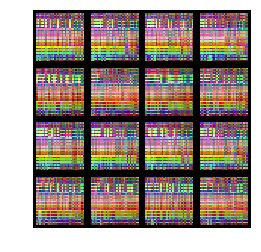

In [22]:
# YOUR CODE HERE
pic_index = np.random.choice(range(num_dev), 16)
pics = X_dev[pic_index].reshape(3, 32, 32, -1).transpose(3, 1, 2, 0)
# plt.imshow(pics[0])
def visualize_pics(pics):
    ## visualization
    num_pics = pics.shape[0]
    grid_size = int(np.ceil(np.sqrt(num_pics)))
    padding = 2
    figure = np.zeros(((32+2*padding)*grid_size, (32+2*padding)*grid_size, 3))
    for r in range(grid_size):
        for c in range(grid_size):
            pid = r*grid_size + c
            if pid < num_pics:
                pic = pics[pid]
                high, low = np.max(pic), np.min(pic)
                pic = 255.0*(pic-low)/(high-low)
                rid = (32+2*padding)*r
                cid = (32+2*padding)*c
                figure[rid+padding:rid+padding+32, cid+padding:cid+padding+32, :] = pic

#     print('num of feature vectors: {}'.format(num_pics))
    plt.imshow(figure.astype('uint8'))
    plt.gca().axis('off')
    plt.show()
visualize_pics(pics)


## Part 2: Automatic batch generator

We want you to create an automatic image generator that does several kinds of data augmentations, and produces a batch of data consisting of random samples every time you call it. 

<span style="color:red">__TODO__:</span> Finish the functions of class __ImageGenerator__ in __ecbm4040/image_generator.py__. The code is fully commented with instructions.

__Hint__: The python keywords __yield__ and __next__ can help you do some tricks.

In [4]:
from ecbm4040.image_generator import ImageGenerator

<span style="color:red">__TODO__:</span> Create an ImageGenerator object using the __development set__, and use __show__ function to plot the top 16 original images.

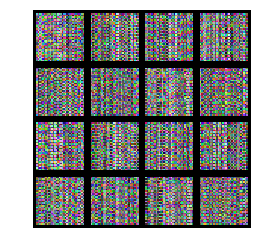

In [31]:
# YOUR CODE HERE
x = X_dev.reshape(3, 32, 32, -1).transpose(3, 1, 2, 0)
y = y_dev
ig = ImageGenerator(x, y)
ig.show()

### Translation

<span style="color:red">__TODO:__</span> Translate the original __development set__ by several pixels in both directions, and plot the top 16 images like you just did.

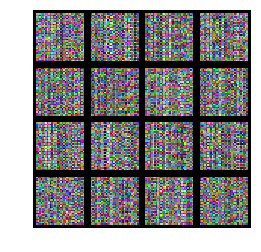

In [32]:
# YOUR CODE HERE
x = X_dev.reshape(3, 32, 32, -1).transpose(3, 1, 2, 0)
y = y_dev
ig = ImageGenerator(x, y)
ig.translate(10,10)
ig.show()

### Rotation

<span style="color:red">__TODO:__</span> Rotate the original __development set__ by several degrees, and plot the top 16 images like you just did. 

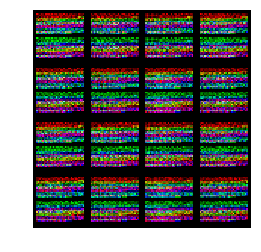

In [35]:
# YOUR CODE HERE
x = X_dev.reshape(3, 32, 32, -1).transpose(3, 1, 2, 0)
y = y_dev
ig = ImageGenerator(x, y)
ig.rotate(30)
ig.show()

### Flipping (horizontal and vertical)

<span style="color:red">__TODO:__</span> Flip the original __development set__ as you like (horizontal, vertical, or both), and plot the top 16 images like you just did. 

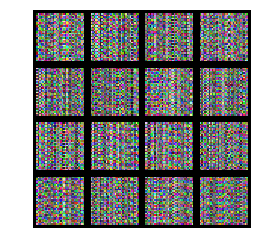

In [42]:
# YOUR CODE HERE
x = X_dev.reshape(3, 32, 32, -1).transpose(3, 1, 2, 0)
y = y_dev
ig = ImageGenerator(x, y)
ig.flip('hv')
ig.show()

### Add Noise

<span style="color:red">__TODO:__</span> Inject random noise into the original __development set__, and plot the top 16 images like you just did.

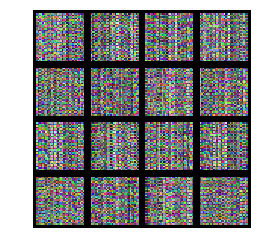

In [44]:
# YOUR CODE HERE
x = X_dev.reshape(3, 32, 32, -1).transpose(3, 1, 2, 0)
y = y_dev
ig = ImageGenerator(x, y)
ig.add_noise(0.1,2)
ig.show()

## Part 3: Data Augmentation + LeNet

<span style="color:red">__TODO__:</span> Now that you have your own data generator. At the end of __ecbm4040/neuralnets/cnn.py__, there is a not-implemented function __my_training_task4()__. Copy the __my_training()__ function above and modify it so that it uses your data generator for training. Train the network again - whether you see and improvement or a drop, record it and analyze why.

In [75]:
# YOUR CODE HERE
X_train, y_train, X_test, y_test = load_data()

X_train = X_train[:10000]
y_train = y_train[:10000]
num_train = 49000
num_val = 1000
num_test = 10000

x = X_train.reshape(3, 32, 32, -1).transpose(3, 1, 2, 0)
y = y_train
ig = ImageGenerator(x, y)
ig.translate(5,5)
X_translate = ig.x.transpose(3,1,2,0).reshape(-1,3072)
y_translate = y

x = X_train.reshape(3, 32, 32, -1).transpose(3, 1, 2, 0)
y = y_train
ig = ImageGenerator(x, y)
ig.rotate(30)
X_rotate = ig.x.transpose(3,1,2,0).reshape(-1,3072)
y_rotate = y

x = X_train.reshape(3, 32, 32, -1).transpose(3, 1, 2, 0)
y = y_train
ig = ImageGenerator(x, y)
ig.flip('hv')
X_flip = ig.x.transpose(3,1,2,0).reshape(-1,3072)
y_flip = y

x = X_train.reshape(3, 32, 32, -1).transpose(3, 1, 2, 0)
y = y_train
ig = ImageGenerator(x, y)
ig.add_noise(0.1,2)
X_noisy = ig.x.transpose(3,1,2,0).reshape(-1,3072)
y_noisy = y

# X_augmented = X_train + X_translate + X_rotate + X_flip + X_noisy
X_augmented = np.concatenate((X_train,X_translate,X_rotate,X_flip,X_noisy), axis=0)
y_augmented = np.concatenate((y_train,y_translate,y_rotate,y_flip,y_noisy), axis=0)

# Seperate Training set into a training set and a validation set
X_val = X_augmented[num_train:]
y_val = y_augmented[num_train:]
X_train = X_augmented[:num_train]
y_train = y_augmented[:num_train]

mean_image = np.mean(X_train, axis=0)
X_train = X_train.astype(np.float32) - mean_image.astype(np.float32)
X_val = X_val.astype(np.float32) - mean_image

X_train = X_train.reshape([-1,32,32,3])/255
X_val = X_val.reshape([-1,32,32,3])/255


print(X_train.shape, X_val.shape, X_test.shape)

./data/cifar-10-python.tar.gz already exists. Begin extracting...
(49000, 32, 32, 3) (1000, 32, 32, 3) (10000, 3072)


In [77]:
import tensorflow as tf
from ecbm4040.neuralnets.cnn import my_training_task4
tf.reset_default_graph()
my_training_task4(X_train, y_train, X_val, y_val)

Building my myLeNet. Parameters: 
conv_featmap=[6, 16]
fc_units=[84]
conv_kernel_size=[5, 5]
pooling_size=[2, 2]
l2_norm=0.01
seed=235
learning_rate=0.01
number of batches for training: 200
epoch 1 
Best validation accuracy! iteration:100 accuracy: 16.599999999999994%
Best validation accuracy! iteration:200 accuracy: 26.200000000000003%
epoch 2 
Best validation accuracy! iteration:400 accuracy: 31.599999999999994%
epoch 3 
Best validation accuracy! iteration:600 accuracy: 32.099999999999994%
epoch 4 
Best validation accuracy! iteration:800 accuracy: 32.900000000000006%
epoch 5 
epoch 6 
epoch 7 
Best validation accuracy! iteration:1400 accuracy: 33.7%
epoch 8 
Best validation accuracy! iteration:1600 accuracy: 34.900000000000006%
epoch 9 
epoch 10 
Best validation accuracy! iteration:2000 accuracy: 36.1%
epoch 11 
epoch 12 
epoch 13 
Best validation accuracy! iteration:2600 accuracy: 36.3%
epoch 14 
Best validation accuracy! iteration:2800 accuracy: 37.4%
epoch 15 
Best validation accu

In [79]:
#without augmentation, training size = 10000
X_train, y_train, X_test, y_test = load_data()

X_train = X_train[:10000]
y_train = y_train[:10000]
num_train = 9800
num_val = 200
num_test = 10000

# Seperate Training set into a training set and a validation set
X_val = X_train[num_train:]
y_val = y_train[num_train:]
X_train = X_train[:num_train]
y_train = y_train[:num_train]

mean_image = np.mean(X_train, axis=0)
X_train = X_train.astype(np.float32) - mean_image.astype(np.float32)
X_val = X_val.astype(np.float32) - mean_image

X_train = X_train.reshape([-1,32,32,3])/255
X_val = X_val.reshape([-1,32,32,3])/255

print(X_train.shape, X_val.shape, X_test.shape)

./data/cifar-10-python.tar.gz already exists. Begin extracting...
(9800, 32, 32, 3) (200, 32, 32, 3) (10000, 3072)


In [80]:
tf.reset_default_graph()
my_training(X_train, y_train, X_val, y_val, 
         conv_featmap=[6, 16],
         fc_units=[84],
         conv_kernel_size=[5, 5],
         pooling_size=[2, 2],
         l2_norm=0.01,
         seed=235,
         learning_rate=1e-2,
         epoch=20,
         batch_size=245,
         verbose=False,
         pre_trained_model=None)

Building my myLeNet. Parameters: 
conv_featmap=[6, 16]
fc_units=[84]
conv_kernel_size=[5, 5]
pooling_size=[2, 2]
l2_norm=0.01
seed=235
learning_rate=0.01
number of batches for training: 40
epoch 1 
epoch 2 
epoch 3 
Best validation accuracy! iteration:100 accuracy: 38.0%
epoch 4 
epoch 5 
Best validation accuracy! iteration:200 accuracy: 45.0%
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
Best validation accuracy! iteration:400 accuracy: 47.5%
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
Best validation accuracy! iteration:600 accuracy: 49.0%
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
Best validation accuracy! iteration:800 accuracy: 50.0%
Traning ends. The best valid accuracy is 50.0. Model named my_lenet_1509650123.


## Analysis

In this case I used 10000 as the training samples size. With data augmentation techiques: translation, rotation, flipping and adding noise, I created 40000 more samples and put these 50000 samples into the model for training. However, the validation accuracy is not as good as using only the 10000 samples from the original training set to train the model.
